In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam


In [2]:
data_train = pd.read_csv("nouse.csv")
data_train.head()

,temperature,humidity,rainfall,decision
0,32,40,0.0,1
1,30,55,1.2,0
2,28,60,0.0,0
3,34,30,0.0,1


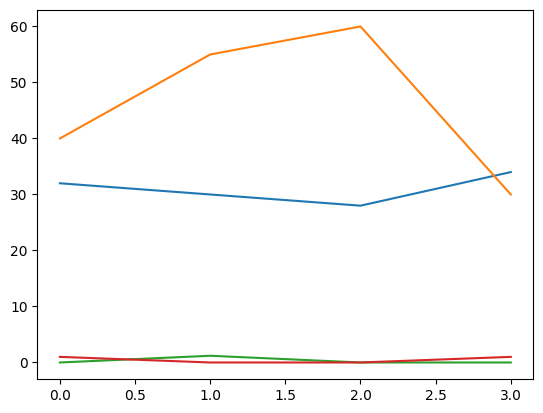

In [3]:
plt.plot(data_train)
plt.show()

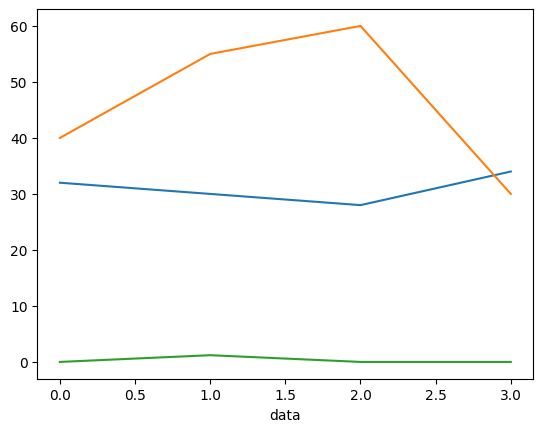

In [7]:
plt.plot(data_train["temperature"])
plt.plot(data_train["humidity"])
plt.plot(data_train["rainfall"])
plt.xlabel("data")
plt.show()

Epoch 1/50


c:\Users\hoker\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 938ms/step - accuracy: 1.0000 - loss: 0.2919 - val_accuracy: 1.0000 - val_loss: 0.1850
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.2889 - val_accuracy: 1.0000 - val_loss: 0.1864
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.2859 - val_accuracy: 1.0000 - val_loss: 0.1878
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 1.0000 - loss: 0.2829 - val_accuracy: 1.0000 - val_loss: 0.1893
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.2800 - val_accuracy: 1.0000 - val_loss: 0.1907
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.2771 - val_accuracy: 1.0000 - val_loss: 0.1921
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.2743 - val_accuracy: 1.0000 - val_loss: 0.1936
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.2715 - val_accuracy: 1.0000 - val_loss: 0.1950
Epoch 9/50

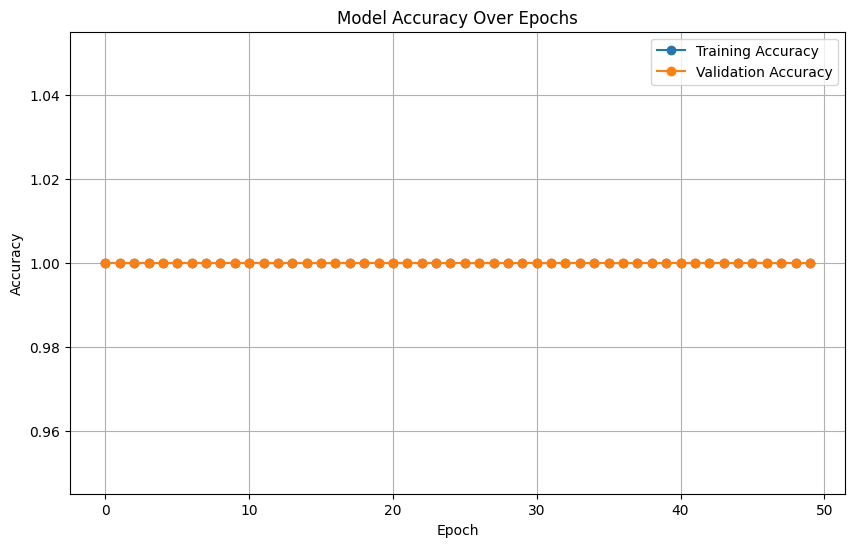

In [23]:

# Assuming data_train is your DataFrame and it's already loaded
X = data_train[['temperature', 'humidity', 'rainfall']]  # Features
y = data_train['decision']  # Labels (1: รดน้ำ, 0: ไม่รดน้ำ)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define the optimizer
optimizer = Adam(learning_rate=0.0001, clipvalue=1.0)

# Build the Neural Network model
model = Sequential([
    Dense(16, input_dim=3, activation='relu'),  # Input layer with 3 features
    Dense(8, activation='relu'),                # Hidden layer
    Dense(1, activation='sigmoid')              # Output layer for binary classification
])

# Compile the model
model.compile(
    optimizer=optimizer, 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

# Train the model and capture the history
history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=128, 
    validation_data=(X_test, y_test)
)

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], marker='o', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], marker='o', label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
import tensorflow as tf
import pynvml
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Check if TensorFlow is using the GPU
if tf.test.is_gpu_available():
    print("TensorFlow is using the GPU")
    
    # Initialize the pynvml library
    pynvml.nvmlInit()
    
    # Get the number of GPU devices
    num_gpus = pynvml.nvmlDeviceGetCount()
    
    # Iterate over GPU devices
    for i in range(num_gpus):
        # Get the device identifier
        handle = pynvml.nvmlDeviceGetHandleByIndex(i)
        # Get the full GPU name
        gpu_name = pynvml.nvmlDeviceGetName(handle)
        print("GPU Name:", gpu_name)
        
    # Shutdown the pynvml library
    pynvml.nvmlShutdown()
else:
    print("TensorFlow is not using the GPU")


TensorFlow is not using the GPU
